In [26]:
import pandas as pd
import polars as pl
import os
import numpy as np

In [3]:
machine_MILL_path = r"Machine_#2_MILL\Machine_#2_MILL"
machine_MILL_days = os.listdir(machine_MILL_path)

# Charge les data de MILL de chaque jour dans un dict
data_MILL = {}
for file in machine_MILL_days :
    file_path = os.path.join(machine_MILL_path, file)
    data_MILL[file] = pl.read_parquet(file_path)
    data_MILL[file] = data_MILL[file].drop("time")


In [4]:
print(data_MILL)

{'13-03-2025_10h35.parquet': shape: (3_177_584, 85)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ stSigAxCu ┆ stSigAxCu ┆ stSigAxCu ┆ stSigAxCu ┆ … ┆ stSigAxPo ┆ stSigAxPo ┆ stSigPowe ┆ __index_ │
│ rrentB    ┆ rrentC    ┆ rrentX    ┆ rrentY    ┆   ┆ werY      ┆ werZ      ┆ rMotS     ┆ level_0_ │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ _        │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ i64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ null      ┆ null      ┆ null      ┆ 0.623217  ┆ … ┆ null      ┆ null      ┆ null      ┆ 0        │
│ 0.305296  ┆ 0.322347  ┆ 0.180628  ┆ null      ┆ … ┆ 0.989401  ┆ 6.314389  ┆ null      ┆ 1        │
│ null      ┆ null      ┆ null      ┆ 0

In [5]:
def combine_first_columns_from_csv(directory):
    """
    Lit tous les fichiers CSV dans un dossier, extrait la première colonne de chacun,
    et les combine en un seul DataFrame avec le nom des fichiers comme colonnes.
    """
    combined_df = pd.DataFrame()  # DataFrame vide pour stocker les données

    for file in os.listdir(directory):
        if file.endswith(".csv"):  # Vérifier si c'est un fichier CSV
            file_path = os.path.join(directory, file)
            
            # Lire seulement la première colonne du fichier
            try :
                df = pd.read_csv(file_path, usecols=[1],sep=";") 
            except :
                print(file_path)
                break

            # Renommer la colonne avec le nom du fichier sans extension
            column_name = os.path.splitext(file)[0]
            df.columns = [column_name]

            # Concaténer avec le DataFrame principal (axis=1 pour fusionner en colonnes)
            combined_df = pd.concat([combined_df, df], axis=1)
        
    print("folder done")

    return combined_df

In [6]:
machine_MECATIS_path = r"Machine_#1_Mecatis\Machine_#1_Mecatis"
machine_MECATIS_days = os.listdir(machine_MECATIS_path)

data_MECATIS = {}
for index, folder in enumerate(machine_MECATIS_days) :
    folder_path = os.path.join(machine_MECATIS_path, folder)
    data_MECATIS[folder] = combine_first_columns_from_csv(folder_path)


folder done
folder done
folder done
folder done
folder done
folder done


In [7]:
print(data_MECATIS)

{'Warmup_Mecatis_03_02_25':          diCodeMesure  lrSigAxeBTemp  lrSigAxeCTemp  lrSigAxeXTemp  \
0                 0.0           10.0           10.0            0.0   
1                 0.0           10.0           10.0            0.0   
2                 0.0           10.0           10.0            0.0   
3                 0.0           10.0           10.0            0.0   
4                 0.0           10.0           10.0            0.0   
...               ...            ...            ...            ...   
2065384           NaN            NaN            NaN            NaN   
2065385           NaN            NaN            NaN            NaN   
2065386           NaN            NaN            NaN            NaN   
2065387           NaN            NaN            NaN            NaN   
2065388           NaN            NaN            NaN            NaN   

         lrSigAxeYTemp  lrSigAxeZTemp  lrSigCryoLubState  \
0                  0.0            0.0                0.0   
1          

In [8]:
def check_df(df):
    # Afficher les premières lignes
    print("HEAD")
    print(df.head(), "\n")

    # Voir les infos du DataFrame
    print("Info")
    print(df.info(), "\n")

In [9]:

def get_machine_means_dict(machine_dict : dict):
    means_dict = {}
    for key, df in machine_dict.items(): 
        means_dict[key]=df.mean()
        means_dict[key].name = key
        print(f"means {key} done")
    print("DONE")
    return means_dict

def get_machine_vars_dict(machine_dict : dict):
    vars_dict = {}
    for key, df in machine_dict.items(): 
        vars_dict[key]=df.var()
        vars_dict[key].name = key
        print(f"vars {key} done")
    print("DONE")
    return vars_dict

In [10]:
MECATIS_means=get_machine_means_dict(data_MECATIS)
MECATIS_vars=get_machine_vars_dict(data_MECATIS)


means Warmup_Mecatis_03_02_25 done
means Warmup_Mecatis_05_02_25 done
means Warmup_Mecatis_10_03_25 done
means Warmup_Mecatis_10_03_25_3 done
means Warmup_Mecatis_10_03_25_4 done
means Warmup_Mecatis_10_03_25_5 done
DONE
vars Warmup_Mecatis_03_02_25 done
vars Warmup_Mecatis_05_02_25 done
vars Warmup_Mecatis_10_03_25 done
vars Warmup_Mecatis_10_03_25_3 done
vars Warmup_Mecatis_10_03_25_4 done
vars Warmup_Mecatis_10_03_25_5 done
DONE


In [11]:
MILL_means=get_machine_means_dict(data_MILL)
MILL_vars=get_machine_vars_dict(data_MILL)

means 13-03-2025_10h35.parquet done
means 13-03-2025_7h35.parquet done
means 19-02-2025_9h20.parquet done
DONE
vars 13-03-2025_10h35.parquet done
vars 13-03-2025_7h35.parquet done
vars 19-02-2025_9h20.parquet done
DONE


In [12]:
#debug

print(type(MILL_means['13-03-2025_10h35.parquet']))
for i in MECATIS_means.values():
    print(i.shape)
    print(type(i))
    print(i.name)

print("\n")
for key, df in MILL_means.items():
    df = df.to_pandas().transpose().squeeze()
    df.name = key
    print(df.shape)
    print(type(df))
    print(df.name)

<class 'polars.dataframe.frame.DataFrame'>
(74,)
<class 'pandas.core.series.Series'>
Warmup_Mecatis_03_02_25
(74,)
<class 'pandas.core.series.Series'>
Warmup_Mecatis_05_02_25
(74,)
<class 'pandas.core.series.Series'>
Warmup_Mecatis_10_03_25
(74,)
<class 'pandas.core.series.Series'>
Warmup_Mecatis_10_03_25_3
(74,)
<class 'pandas.core.series.Series'>
Warmup_Mecatis_10_03_25_4
(71,)
<class 'pandas.core.series.Series'>
Warmup_Mecatis_10_03_25_5


(85,)
<class 'pandas.core.series.Series'>
13-03-2025_10h35.parquet
(85,)
<class 'pandas.core.series.Series'>
13-03-2025_7h35.parquet
(85,)
<class 'pandas.core.series.Series'>
19-02-2025_9h20.parquet


In [13]:
MECATIS_mean_list = [i for i in MECATIS_means.values()]
MILL_mean_list = []
for key, df in MILL_means.items():
    df = df.to_pandas().transpose().squeeze()
    df.name = key
    MILL_mean_list.append(df)


df_means = pd.concat(MECATIS_mean_list + MILL_mean_list, axis=1)

MECATIS_var_list = [i for i in MECATIS_vars.values()]
MILL_var_list = []
for key, df in MILL_vars.items():
    df = df.to_pandas().transpose().squeeze()
    df.name = key
    MILL_var_list.append(df)

df_vars = pd.concat(MECATIS_var_list + MILL_var_list, axis=1)


In [14]:
df_means.to_excel("means.xlsx")
df_vars.to_excel("variances.xlsx")

In [24]:
def clean_df (df, forbiden_values=[0,1,10,100]):
    df_clean = df.dropna()

    for i in forbiden_values :
        df_clean = df_clean[(df_clean != i).all(axis=1)]

    return df_clean

df_means_clean = clean_df(df_means)
df_vars_clean = clean_df(df_vars)

df_means_clean.to_excel("means_clean.xlsx")
df_vars_clean.to_excel("vars_clean.xlsx")
print(df_means_clean)

                       Warmup_Mecatis_03_02_25  Warmup_Mecatis_05_02_25  \
lrSigSpindleTemp                    -55.916870                36.653430   
stSigAxCurrentB                       1.959723                 1.998565   
stSigAxCurrentX                       1.105021                 1.078263   
stSigAxCurrentY                       0.517529                 0.529945   
stSigAxCurrentZ                       0.973509                 0.946384   
stSigAxFollErrB                      32.056327                31.568274   
stSigAxFollErrX                       1.776078                 2.197867   
stSigAxFollErrY                       5.090024                 4.912941   
stSigAxFollErrZ                       0.591702                 0.528957   
stSigAxPosACSB                       22.626532                22.625782   
stSigAxPosACSC                      253.694206               253.686692   
stSigAxPosACSX                      -23.115242               -23.114308   
stSigAxPosACSY           

In [31]:
arr_means_clean = df_means_clean.to_numpy()
arr_vars_clean = df_vars_clean.to_numpy()

print(arr_means_clean.shape)
print(arr_vars_clean.shape)

X = np.concatenate((arr_means_clean, arr_vars_clean), axis=0)

print(X.shape)
X = X.transpose()
print(X.shape)

(27, 9)
(27, 9)
(54, 9)
(9, 54)


In [33]:
from sklearn.decomposition import PCA

# Appliquer PCA pour réduire à 3 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Affichage des nouvelles dimensions
print("Shape après PCA :", X_pca.shape)  # Devrait afficher (9, 3)
print("Données réduites :", X_pca)

explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante :", explained_variance)
print("Variance totale expliquée :", np.sum(explained_variance))

Shape après PCA : (9, 2)
Données réduites : [[-1.62097856e+12  2.32480228e+05]
 [-1.62097856e+12  2.32480590e+05]
 [-1.62097856e+12  2.32480589e+05]
 [-1.62097856e+12  2.32480613e+05]
 [-1.62097856e+12  2.32480594e+05]
 [-1.62097856e+12  2.32480549e+05]
 [ 3.27000106e+12  3.92625721e+07]
 [ 3.26999329e+12  4.04448958e+07]
 [ 3.18587700e+12 -8.11023511e+07]]
Variance expliquée par chaque composante : [1.00000000e+00 2.06237795e-10]
Variance totale expliquée : 0.9999999999999657


(6, 2)
(3, 2)


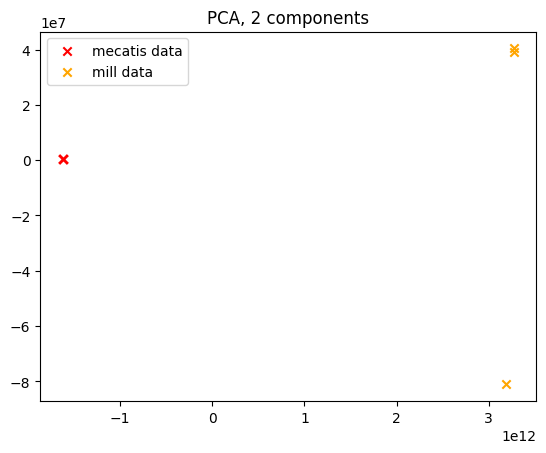

In [44]:
import matplotlib.pyplot as plt

X_mecatis, X_mill = X_pca[:6], X_pca[6:]
print(X_mecatis.shape)
print(X_mill.shape)

plt.scatter(X_mecatis[:,0], X_mecatis[:,1], color='red', label="mecatis data", marker="x")
plt.scatter(X_mill[:,0],X_mill[:,1], color='orange', label="mill data", marker="x")
plt.legend()
plt.title("PCA, 2 components")
plt.show()

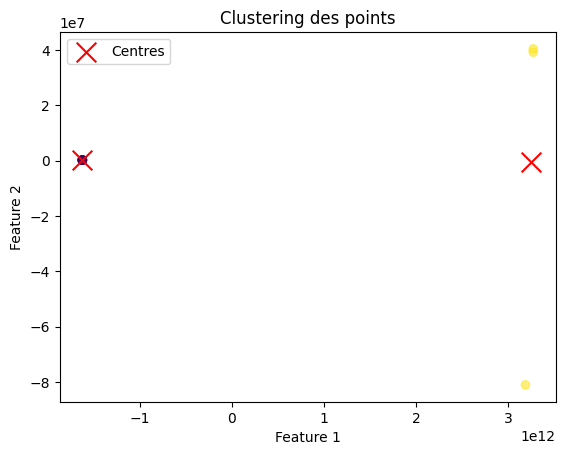

In [46]:
from sklearn.cluster import KMeans
def cluster_points(data: np.ndarray, n_clusters: int = 3):
    """
    Applique l'algorithme de clustering KMeans aux données fournies.
    
    :param data: np.ndarray de shape (n_samples, n_features)
    :param n_clusters: Nombre de clusters à former
    :return: Les labels des clusters et les centres des clusters
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    centers = kmeans.cluster_centers_
    
    return labels, centers

def plot_clusters(data: np.ndarray, labels: np.ndarray, centers: np.ndarray):
    """
    Affiche les clusters et leurs centres (valable uniquement pour n_features=2).
    
    :param data: np.ndarray de shape (n_samples, 2)
    :param labels: Labels des clusters attribués aux points
    :param centers: Centres des clusters
    """
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centres')
    plt.title('Clustering des points')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


labels, centers = cluster_points(X_pca, n_clusters=2)
plot_clusters(X_pca, labels, centers)
